Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_tempmatch_2.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

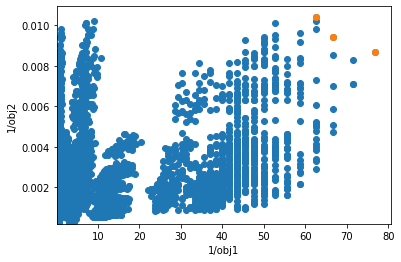

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


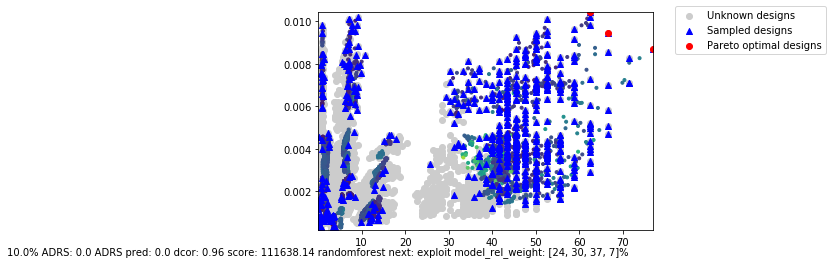

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([5045, 4220, 3395, 1364, 2387,    0, 3070, 2046,   64,    1,    4,
        128,    2,   65,    8,    5,   68,   69,   72, 1023,   16,   84,
        129,   81,  144, 2817, 2058, 2094,  256, 2241, 3069, 2097,   32,
       3018,   17, 6053,   20, 5792,   80, 2238,  132, 2061,  324,   66,
         85,    9, 1842,   13,   12, 1038,  272, 1071,   21,   73,  512,
        100, 1074,  257,  321,   24,   76,   77,   88,   92, 1024,  192,
        194,  193,  196,  200, 1263, 2286,  197,  208,  224,  448,  201,
        212,  449,  453,  205,  705,  204,  141,  209, 1043,  198,  228,
         18, 1215,  704, 1278,  461,  385,  960,   89,  481,  261,  452,
       1216,  450,  217,  133,  457,  513,  709,  320,  465,  265,  104,
        460,  213,   48,   49,  112,  113,   52,   53, 1982, 3021, 4134,
       6145, 4071,   33, 2298, 2257, 1803, 5663, 2289, 1275, 6274,   96,
       5662, 5909, 5898, 6150, 2270,   37, 1854, 5867,  117, 6030, 3246,
         57, 6033,   28,   97, 2250,   50,    3,  1